# 0. Setup Paths

In [1]:
import os

In [4]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'


In [5]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [6]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [11]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [7]:
files


{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [14]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [15]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
  warnings.wa

Obtaining file:///C:/ProgramData/Anaconda3/envs/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.9.0: C:\ProgramData\Anaconda3\envs\tf_gpu\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0530 16:42:57.180739 14620 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0530 16:42:57.185261 14620 batch_normalization.py:1426]

In [11]:
pip install tensorflow-addons

                                              0.0/746.7 kB ? eta -:--:--
     -                                        30.7/746.7 kB ? eta -:--:--
     -----                                  112.6/746.7 kB 1.3 MB/s eta 0:00:01
     ----------------                       317.4/746.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------      665.6/746.7 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 746.7/746.7 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires pycocotools, which is not installed.
tf-models-official 2.12.0 requires sentencepiece, which is not installed.
tf-models-official 2.12.0 requires seqeval, which is not installed.
tf-models-official 2.12.0 requires tensorflow-datasets, which is not i

In [10]:
pip list


Package                      Version     Editable project location
---------------------------- ----------- ------------------------------------------------------------------------
absl-py                      1.4.0
antimony                     2.13.4
apache-beam                  2.48.0rc2
appdirs                      1.4.4
asttokens                    2.2.1
astunparse                   1.6.3
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2023.5.7
charset-normalizer           3.1.0
clang                        5.0
colorama                     0.4.6
comm                         0.1.3
contextlib2                  21.6.0
contourpy                    1.0.7
cycler                       0.11.0
Cython                       3.0.0b3
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.9
fonttools                    4.39.4
g

In [9]:
pip install gin-config==0.1.1

                                              0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gin-config: filename=gin_config-0.1.1-py3-none-any.whl size=38390 sha256=d1675a5652151e5d1fe3b462ef5f18328690d3a9ac45cf46b8494ca161aede87
  Stored in directory: c:\users\harshit\appdata\local\pip\cache\wheels\9b\d3\c6\f198130aa1f7f8bb7de3f661629491d1f7a0a7abbae0b0532d
Successfully built gin-config
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires pycocotools, which is not installed.
tf-models-official 2.12.0 requires sentencepiece, which is not installed.
tf-models-official 2.12.0 requires seqeval, which is not installed.
tf-models-official 2.12.0 requires tensorflow-addons, which is not ins

In [8]:
conda install protobuf

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3\envs\tf_gpu

  added / updated specs:
    - protobuf


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libprotobuf-3.20.3         |       h23ce68f_0         2.2 MB
    protobuf-3.20.3            |   py39hd77b12b_0         232 KB
    zlib-1.2.13                |       h8cc25b3_0         113 KB
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  libprotobuf        pkgs/main/win-64::libprotobuf-3.20.3-h23ce68f_0
  protobuf           pkgs/main/win-64::protobuf-3.20.3-py39hd77b12b_0
  zlib               pkgs/main/win-64::zlib-1.2.13-h8cc25b3_0

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> pkgs/main:

In [9]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-content-trust-0.1.3  |   py38haa95532_0          86 KB
    conda-package-handling-2.1.0|   py38haa95532_0         286 KB
    conda-package-streaming-0.8.0|   py38haa95532_0          28 KB
    conda-token-0.4.0          |     pyhd3eb1b0_0          13 KB
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    zstandard-0.19.0           |   py38h2bbff1b_0         340 KB
    ------------------------------------------------------------
                                           Total:         766 KB

The following NEW packages will be INSTALLED:

  conda-package-str~ pkgs/main/win-64::conda-package-streaming-0.8.0-py38haa95532_0
  zstandard          pkgs/main/win-64::zstandard-0.



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [15]:
!pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.6 MB 653.6 kB/s eta 0:00:12
                                              0.2/7.6 MB 1.1 MB/s eta 0:00:08
     -                                        0.3/7.6 MB 1.3 MB/s eta 0:00:06
     --                                       0.4/7.6 MB 1.5 MB/s eta 0:00:05
     --                                       0.5/7.6 MB 1.8 MB/s eta 0:00:04
     ----                                     0.8/7.6 MB 2.3 MB/s eta 0:00:03
     -----                                    1.0/7.6 MB 2.5 MB/s eta 0:00:03
     ------                                   1.3/7.6 MB 2.9 MB/s eta 0:00:03
     --------                                 1.5/7.6 MB 3.1 MB/s eta 0:00:02
     ----------                               2.0/7.6 MB 3.7 MB/s eta 0:00:02
     -----------                              2.2/7.6 MB 3.8 MB/s eta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires gin-config, which is not installed.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-p

In [12]:
pip install protobuf==3.20.*

                                              0.0/904.2 kB ? eta -:--:--
                                              10.2/904.2 kB ? eta -:--:--
     -                                     30.7/904.2 kB 640.0 kB/s eta 0:00:02
     --                                    71.7/904.2 kB 558.5 kB/s eta 0:00:02
     ----                                 112.6/904.2 kB 726.2 kB/s eta 0:00:02
     -----                                143.4/904.2 kB 652.5 kB/s eta 0:00:02
     -------                              194.6/904.2 kB 737.3 kB/s eta 0:00:01
     ----------                           256.0/904.2 kB 785.2 kB/s eta 0:00:01
     ------------                         307.2/904.2 kB 791.9 kB/s eta 0:00:01
     --------------                       358.4/904.2 kB 794.9 kB/s eta 0:00:01
     -----------------                    440.3/904.2 kB 860.2 kB/s eta 0:00:01
     -------------------                  481.3/904.2 kB 861.1 kB/s eta 0:00:01
     ---------------------                532.5/904.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.9 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.5 which is incompatible.


In [31]:
!pip install protobuf

  Using cached protobuf-4.23.1-cp39-cp39-win_amd64.whl (422 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires absl-py~=0.10, but you have absl-py 1.4.0 which is incompatible.
tensorflow-gpu 2.6.0 requires flatbuffers~=1.12.0, but you have flatbuffers 23.5.9 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!pip uninstall protobuf

In [15]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
  Using cached jax-0.4.10.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
                                              0.0/120.3 kB ? eta -:--:--
     ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
sacrebleu 2.2.0 requires portalocker, which is not installed.
sacrebleu 2.2.0 requires regex, which is not installed.
sacrebleu 2.2.0 requires tabulate>=0.8.9, which is not installed.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires gin-config, which is not installed.
tf-models-official 2.12.0 requires google-ap

In [14]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
  Using cached protobuf-4.23.1-cp39-cp39-win_amd64.whl (422 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [585 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\setuptools\dist.py:285: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, SetuptoolsDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-

In [28]:
!pip install pyyaml

                                              0.0/151.6 kB ? eta -:--:--
     ---------                             41.0/151.6 kB 960.0 kB/s eta 0:00:01
     -----------------------------------    143.4/151.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 151.6/151.6 kB 1.5 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires gin-config, which is not installed.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires matplotlib, which is not installed.
tf-models-official 2.12.0 requires oauth2client, which is not installed.
tf-models-official 2.12.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.12.0 requires Pillow, which is not installed.
tf-models-official 2.12.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.12.0 requires pycocotools, which is not installed.
tf-

In [11]:
import object_detection

In [29]:
!pip install Pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.12.0 requires Cython, which is not installed.
tf-models-official 2.12.0 requires gin-config, which is not installed.
tf-models-official 2.12.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.12.0 requires immutabledict, which is not installed.
tf-models-official 2.12.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.12.0 requires matplotlib, whi


                                              0.0/2.5 MB ? eta -:--:--
                                              0.0/2.5 MB 960.0 kB/s eta 0:00:03
                                              0.1/2.5 MB 812.7 kB/s eta 0:00:04
     -                                        0.1/2.5 MB 901.1 kB/s eta 0:00:03
     --                                       0.2/2.5 MB 871.5 kB/s eta 0:00:03
     ----                                     0.3/2.5 MB 1.2 MB/s eta 0:00:02
     ------                                   0.4/2.5 MB 1.4 MB/s eta 0:00:02
     -------                                  0.5/2.5 MB 1.5 MB/s eta 0:00:02
     ---------                                0.6/2.5 MB 1.7 MB/s eta 0:00:02
     ----------                               0.7/2.5 MB 1.7 MB/s eta 0:00:02
     ------------                             0.8/2.5 MB 1.7 MB/s eta 0:00:02
     --------------                           0.9/2.5 MB 1.8 MB/s eta 0:00:01
     ----------------                         1.1/2.5 MB 1.9 M

In [11]:
!pip list

Package                      Version  Editable project location
---------------------------- -------- ------------------------------------------------------------------------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2023.5.7
charset-normalizer           3.1.0
clang                        5.0
colorama                     0.4.6
comm                         0.1.3
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.9
gast                         0.4.0
google-auth                  2.18.1
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.54.2
h5py                         3.1.0
idna                         3.4
importlib-metadata           6.6.0
ipykernel                    6.23.1
ipython          

In [16]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 21% [...............                                                         ]  4308992 / 20515344

 39% [............................                                            ]  8175616 / 20515344

 60% [...........................................                             ] 12369920 / 20515344

 79% [.........................................................               ] 16343040 / 20515344

 99% [....................................................................... ] 20422656 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [12]:
paths['PRETRAINED_MODEL_PATH']

'Tensorflow\\workspace\\pre-trained-models'

# 2. Create Label Map

In [13]:
labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [32]:
!pip install pytz

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [20]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [14]:
paths['SCRIPTS_PATH']

'Tensorflow\\scripts'

In [15]:
if  os.path.exists(files['TF_RECORD_SCRIPT']):
    print("yes")
else:
    print("no")

yes


In [33]:
paths['IMAGE_PATH']

'Tensorflow\\workspace\\images'

In [16]:
files['TF_RECORD_SCRIPT']

'Tensorflow\\scripts\\generate_tfrecord.py'

In [34]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [35]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [37]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet'

# 5. Update Config For Transfer Learning

In [36]:
paths['PRETRAINED_MODEL_PATH']

'Tensorflow\\workspace\\pre-trained-models'

In [17]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [14]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [15]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
    

In [16]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [17]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [18]:
 config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

In [19]:
files['PIPELINE_CONFIG']


'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'

# 6. Train the model

In [20]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [21]:
paths['APIMODEL_PATH']


'Tensorflow\\models'

In [52]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [53]:
!{command}

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py", line 31, in <module>
    from object_detection import model_lib_v2
  File "C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\eval_util.py", line 35, in <module>
    from object_detection.metrics import coco_evaluation
  File "C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\metrics\coco_evaluation.py", line 25, in <module>
    from object_detection.metrics import coco_tools
  File "C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\metrics\coco_tools.py", line 51, in <module>
    from pycocotool

# 7. Evaluate the Model

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [24]:
files['PIPELINE_CONFIG']


'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'

In [56]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet'

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [58]:
#tensorboard time 2.30

In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [18]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [67]:
pip install msvc-runtime

                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB 660.6 kB/s eta 0:00:03
     -                                        0.1/1.8 MB 825.8 kB/s eta 0:00:03
     --                                       0.1/1.8 MB 585.1 kB/s eta 0:00:03
     --                                       0.1/1.8 MB 654.9 kB/s eta 0:00:03
     ---                                      0.1/1.8 MB 711.9 kB/s eta 0:00:03
     -----                                    0.2/1.8 MB 801.7 kB/s eta 0:00:02
     ------                                   0.3/1.8 MB 905.4 kB/s eta 0:00:02
     -------                                  0.3/1.8 MB 999.0 kB/s eta 0:00:02
     ----------                               0.5/1.8 MB 1.1 MB/s eta 0:00:02
     ------------                             0.6/1.8 MB 1.2 MB/s eta 0:00:01
     -------------                            0.6/1.8 MB 1.2 MB/s eta 0:00:01
     --------------                           0.7/1.8 M

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\tf_gpu\\msvcp140_1.dll'
Consider using the `--user` option or check the permissions.



In [19]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [20]:
import cv2 
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
pip list


Package                      Version     Editable project locationNote: you may need to restart the kernel to use updated packages.

---------------------------- ----------- ------------------------------------------------------------------------
absl-py                      1.4.0
antimony                     2.13.4
apache-beam                  2.48.0rc2
appdirs                      1.4.4
asttokens                    2.2.1
astunparse                   1.6.3
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2023.5.7
charset-normalizer           3.1.0
clang                        5.0
colorama                     0.4.6
comm                         0.1.3
contextlib2                  21.6.0
contourpy                    1.0.7
cycler                       0.11.0
Cython                       3.0.0b3
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuf

In [67]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [71]:
files['LABELMAP']

'Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [68]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thankyou.f02871e7-f826-11ed-95ac-145afc2e6e66.jpg')

In [69]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\thankyou.f02871e7-f826-11ed-95ac-145afc2e6e66.jpg'

NameError: name 'image_np_with_detections' is not defined

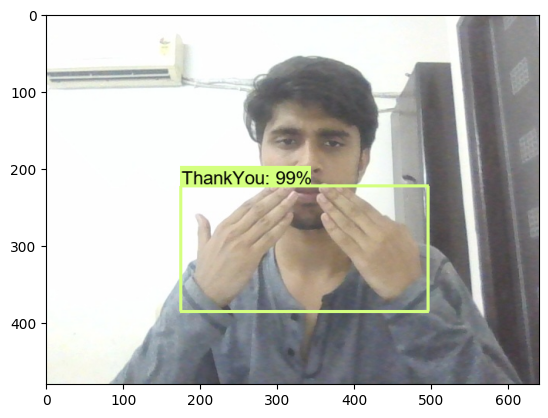

In [70]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [74]:
!pip uninstall opencv-python-headless -y

In [75]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [21]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [22]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [23]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [79]:
!{command}

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0530 16:09:38.915148  9888 deprecation.py:641] From C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is d

'Tensorflow\\workspace\\models\\my_ssd_mobnet\\export'

# 11. Conversion to TFJS

In [51]:

!pip install tensorflowjs


  Using cached tensorflowjs-4.6.0-py3-none-any.whl (85 kB)
  Using cached flax-0.6.2-py3-none-any.whl (189 kB)
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.5.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.4.0-py3-none-any.whl (85 kB)
  Using cached flax-0.6.10-py3-none-any.whl (226 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflowjs-4.3.0-py3-none-any.whl (85 kB)
  Using cached tensorflowjs-4.2.0-py3-none-any.whl (84 kB)
  Using cached tensorflowjs-4.1.0-py3-none-any.whl (84 kB)
  Using cached tensorflowjs-4.0.0-py3-none-any.whl (83 kB)
  Using cached tensorflowjs-3.21.0-py3-none-any.whl (81 kB)
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
  Using cached msgpack-1.0.5-cp39-cp39-win_amd64.whl (62 kB)
  Using cached optax-0

ERROR: Cannot install flax because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement package_coffee>0.44.* (from versions: none)
ERROR: No matching distribution found for package_coffee>0.44.*


In [26]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])


In [27]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [34]:
!{command}

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')